## Naslov projekta: Analiza podatkov o prometnih nesrecah v Sloveniji


Opis problema: Prometne nesrece predstavljajo pomemben druzbeni problem, saj lahko povzrocijo veliko materialno skodo, poskodbe ali celo smrt. Namen tega projekta je analizirati podatke o prometnih nesrecah v Sloveniji, da bi lahko identificirali vorce, trende in dejavnike tveganja ter razvili smernice za izbolisanje varnosti na cestah.

Cilji/vprasanja:

1. Kateri so najpogostejsi vroki prometnih nesrec v Sloveniji?
2. Kateri so najbolj ogrozeni udelezenci v prometu?
3. Kako se stevilo prometnih nesrec spreminja skozi cas?
4. Analiza specifičnih vrst nesreč: Nabor podatkov vključuje informacije o vrsti nesreče, tako da je mogoče analizirati, katere vrste nesreč so najpogostejše, katere so najbolj nevarne in kateri dejavniki prispevajo k njim.
5. Kaksna je povezava med razlicnimi dejavniki tveganja (npr. alkohol, prekoractev hitrosti, slaba vidljivost) in verjetnostjo prometne nesrece?


### Podatki

Oblika podatkov: Podatki so bili zajeti iz spletne strani OPSI (https://podatki.gov.si/dataset/mnzpprometne-nesrece-od-leta-2009-dalje), kjer so na voljo podatki o prometnih nesrecah v Sloveniji za obdobje 2009-2022. Podatki so v obliki CSV datotek, ki vsebujejo podrobne informacije o ZaporednaStevilkaPN, KlasifikacijaNesrece, UpravnaEnotaStoritve, DatumPN, UraPN, VNaselju, Lokacija, VrstaCesteNaselja, SifraCesteNaselja, TekstCesteNaselja, SifraOdsekaUlice, TekstOdsekaUlice, StacionazaDogodka. OpisKraja, VzrokNesrece, TipNesrece, VremenskeOkoliscine, StanjePrometa, StanjeVozisca, VrstaVozisca, GeoKoordinataX, GeoKoordinataY, ZaporednaStevilkaOsebeVPN, Povzrocitelj, Starost, Spol, UEStalnegaPrebivalisca, Drzavljanstvo, PoskodbaUdelezenca, VrstaUdelezenca, UporabaVarnostnegaPasu, VozniskiStazVLetih, VozniskiStazVMesecih, VrednostAlkotesta, VrednostStrokovnegaPregleda. Podatki so med seboj loceni s ";", zato ji je najprej potrebno med seboj ločiti in ustrezno oblikovati.

Analiza podatkov je potekala po oblikovanih ciljih, kjer smo z ustreznimi vizualizacijskimi orodi prikazali ugotovitve ciljev.

#### 1. Zanimalo nas je, kateri so najpogostejši vzroki za nastanek prometne nesreče. Ugotovili smo, da so to premiki z vozilom, neprilagojena hitrost in neupoštevanja pravil o prednosti.

Odgovor: **todo**

#### 2.1. Ugotovili smo, da so največji ogroženci v prometu po starosti med 25 in 29 let, med 30 in 34 ter med 20 in 24. Glede na raziskavo bi lahko rekli, da so največji udeleženci prometnih nesreč med starostjo 20 in 34 let.:


Odgovor: **todo**

#### 2.2. Ugotiili smo, da je za skoraj polovico več udeležencev v prometnih nesrečah v Sloveniji med letom 2009 in 2022 bilo ženskega spola.:

Odgovor: **todo**

#### 2.3. Glede na vrsto udeležencev v prometnih nesrečah je bilo daleč največ udeležencev v voznikov osebnih avtomobilov, voznikov tovornih vozil ter potnikov.


In [28]:
# kodo lahko razdelite v več celic

Odgovor: **todo**

#### 3. Spraševali smo se, kako se število nesreč spreminja skozi i čas kjer smo vzeli CSV datoteke nesreč od 2009-2021. Podatke o nesrečah smo združevali po mesecih. Ugotovili smo, da se nesreče večkrat pojavljajo poleti.

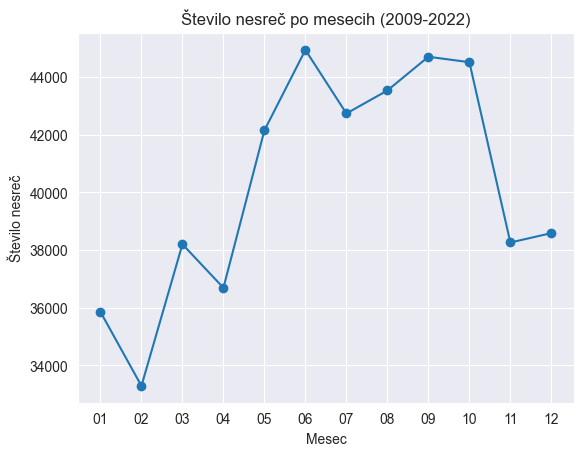

In [29]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datoteke = ["pn2009", "pn2010", "pn2011", "pn2012", "pn2013", "pn2014", "pn2015", "pn2016", "pn2017", "pn2018", "pn2019", "pn2020", "pn2021", "pn2022"]
nesrece_datum = {}
for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            mesec = int(row[0].split(";")[3].split(".")[1])
            nesrece_datum[mesec] = nesrece_datum.get(mesec, 0) + 1

nesrece_datum_sorted = {k: v for k, v in sorted(nesrece_datum.items(), key=lambda item: int(item[0]))}
meseci = list(nesrece_datum_sorted.keys())
stevila_nesrec = list(nesrece_datum_sorted.values())

meseci_str = [str(m).zfill(2) for m in meseci]

plt.plot(meseci_str, stevila_nesrec, marker='o')
plt.title("Število nesreč po mesecih (2009-2022)")
plt.xlabel("Mesec")
plt.ylabel("Število nesreč")
plt.show()

Odgovor: **todo**

#### 3.1. Ugotovili smo tudi, da se čez poleten čas se nesreče dogajajo zaradi neupoštevanja pravil prednosti, med tem, ko se pozimi dogajajo zaradi neprilagojene hitrosti.

In [30]:

vzroki_datum = {}
for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            mesec = int(row_split[3].split(".")[1])
            Vzrok = row_split[14]
            count = 1
            if mesec in vzroki_datum and Vzrok in vzroki_datum[mesec] and Vzrok != "PREMIKI Z VOZILOM":
                count = vzroki_datum[mesec][Vzrok] + 1
            vzroki_datum.setdefault(mesec, {}).update({Vzrok: count})

max_vzrok_mesec = {}
for mesec, vzroki in vzroki_datum.items():
    max_vzrok = max(vzroki, key=lambda k: vzroki[k])
    max_vzrok_mesec[mesec] = max_vzrok

max_vzrok_mesec_sorted = {k: v for k, v in sorted(max_vzrok_mesec.items(), key=lambda item: int(item[0]))}
meseci = {1:"januar", 2:"februar", 3:"marec", 4:"april", 5:"maj", 6:"junij", 7:"julij", 8:"avgust", 9:"november", 10:"oktober", 11:"november", 12:"december"}
for mesec, vzrok in max_vzrok_mesec_sorted.items():
    print(f"{meseci[mesec]}: {vzrok}")

januar: NEPRILAGOJENA HITROST
februar: NEPRILAGOJENA HITROST
marec: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
april: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
maj: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
junij: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
julij: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
avgust: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
november: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
oktober: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
november: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
december: NEPRILAGOJENA HITROST


Odgovor: **todo**

#### 4. Spraševali smo se katere vrste nesreč so najpogostejše, katere so najbolj nevarne in kateri dejavniki prispevajo k njim. Podatke smo grupirali po vzroku nesreče in potem po posledici nesreče. Ugotovili smo, da se večina nesreč konča z materialno škodo, zaradi neustreznih premikov s vozilom. Največ smrti in resnih telesnih poškodb pa so posledice prehitre vožnje.

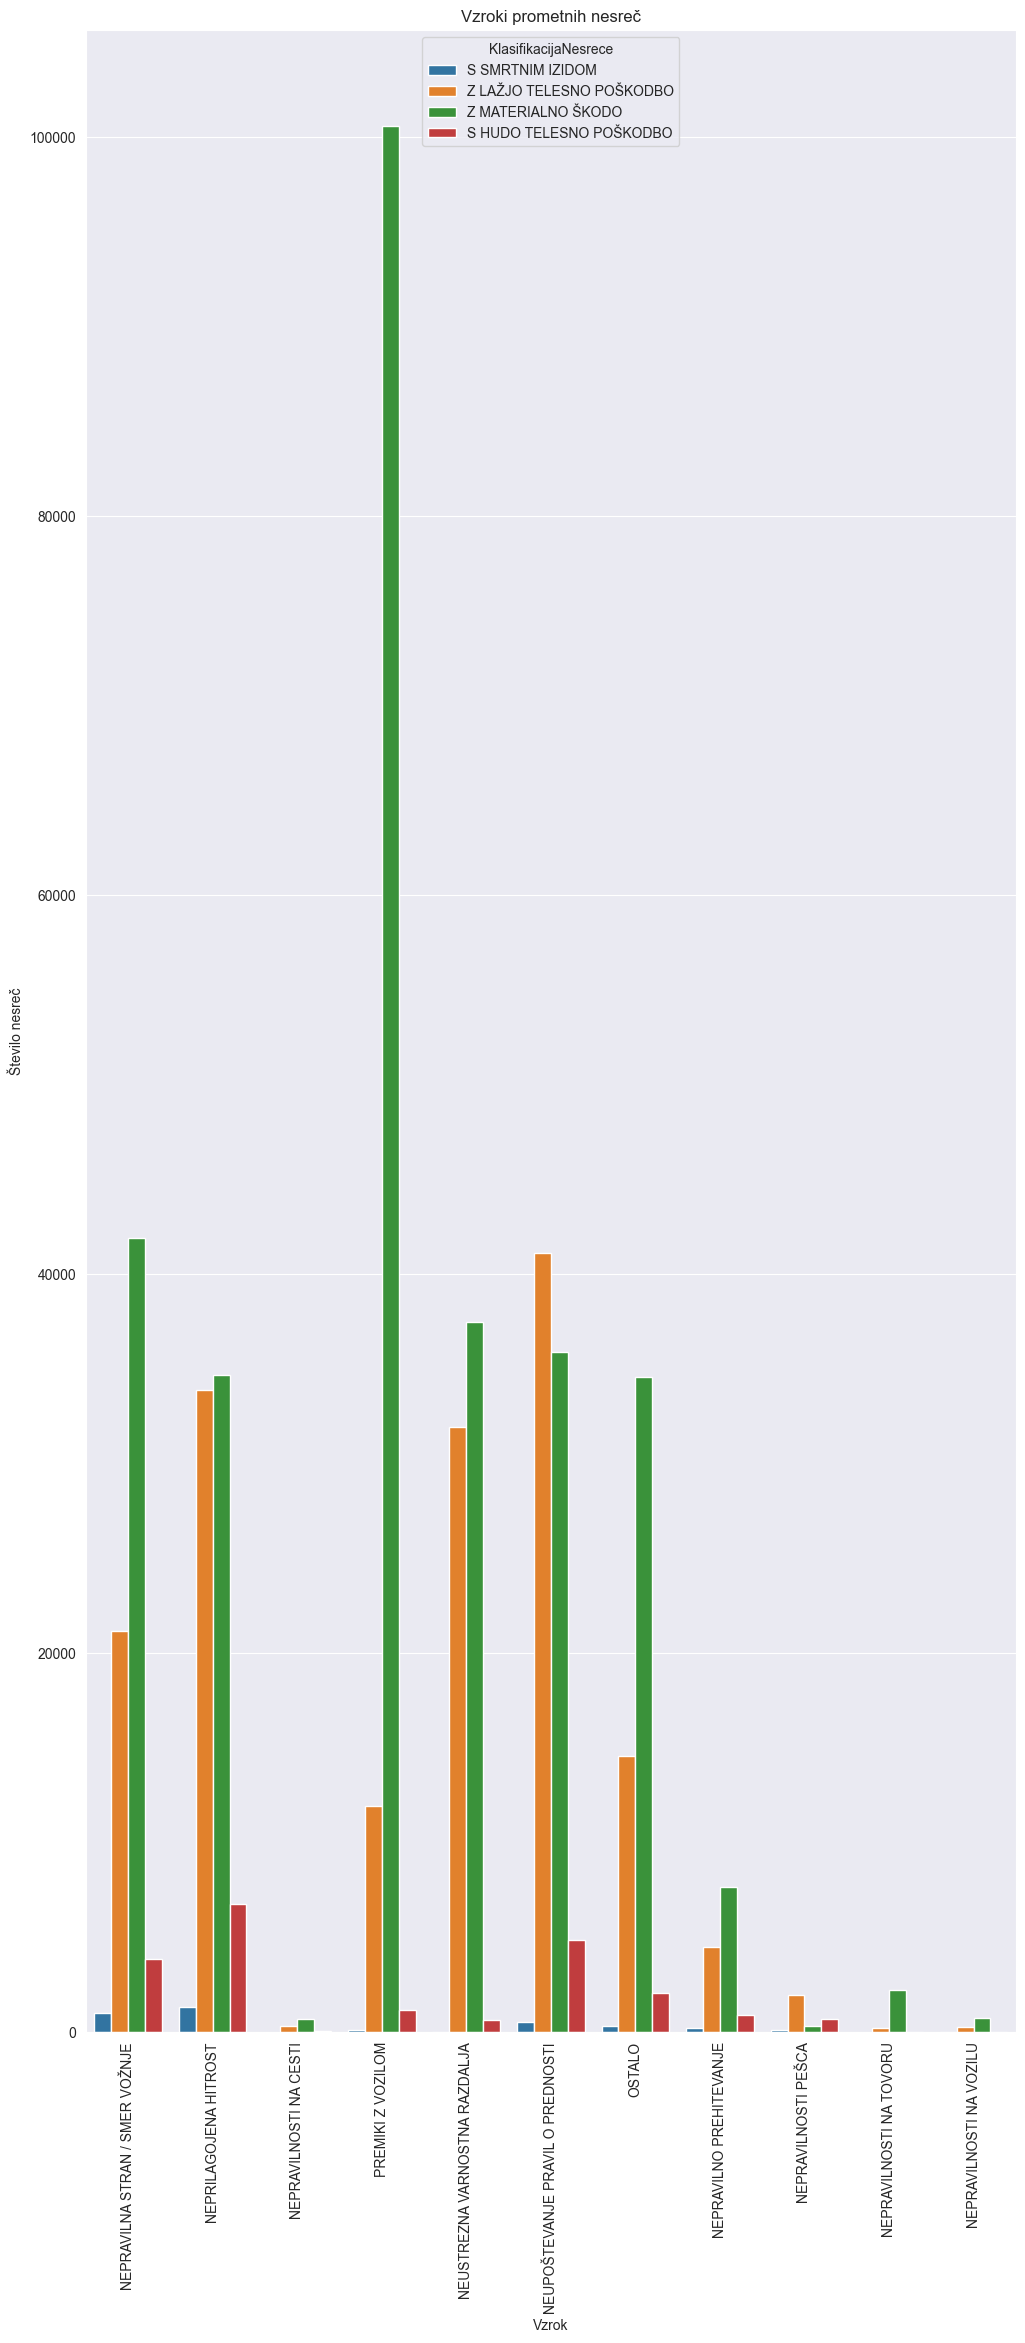

In [31]:
vzroki = {}
klasifikacije = set()
for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            Vzrok = row_split[14]
            KlasifikacijaNesrece = row_split[1]
            klasifikacije.add(KlasifikacijaNesrece)

            if (Vzrok, KlasifikacijaNesrece) not in vzroki:
                vzroki[(Vzrok, KlasifikacijaNesrece)] = 1
            else:
                vzroki[(Vzrok, KlasifikacijaNesrece)] += 1

vzroki_df = pd.DataFrame(list(vzroki.items()), columns=['Vzrok, KlasifikacijaNesrece', 'Število nesreč'])
vzroki_df[['Vzrok', 'KlasifikacijaNesrece']] = pd.DataFrame(vzroki_df['Vzrok, KlasifikacijaNesrece'].tolist(), index=vzroki_df.index)

plt.figure(figsize=(12, 26))
sns.set_style("darkgrid")
ax = sns.barplot(x="Vzrok", y="Število nesreč", hue='KlasifikacijaNesrece', hue_order=list(klasifikacije), data=vzroki_df)
ax.set_title("Vzroki prometnih nesreč")
ax.set_xlabel("Vzrok")
ax.set_ylabel("Število nesreč")
plt.xticks(rotation=90)
plt.show()

Odgovor: **todo**

#### 5.1. Ugotavljali smo tudi vpliv alkohola na nesreče glede na preteklo prisotnost alkohola pri nesrečah, kjer opazimo, da je relativno majhen procent nesreč pod vplivom alkohola.:

Odgovor: **todo**

#### 5.2. Pregledovali so tudi povezavo vozne podlage z pogostostjo nesreč.:

In [32]:
# kodo lahko razdelite v več celic

Odgovor: **todo**

#### 5.3. Pri opazovanju nesreč glede na stanje cestišča presenetljivo ugototivmo da se večino nesreč zgodi na suhih cestah.

Odgovor: **todo**

#### 5.4. Za promet pa smo ugotovili da ne vliva veliko na verjetnost nesreče, saj je relativno dobro razporejeno čez vse kategorije.:

In [33]:
# kodo lahko razdelite v več celic

Odgovor: **todo**